## Proyecto 2:  Agrupación
### Mall Customers
Pablo López Landeros 178863

Juan Pablo Álvarez Gamboa 165815   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib inline

In [2]:
customers = pd.read_csv('C:/Users/jp_al/Mall_Customers/Mall_Customers.csv')
customers.shape

(200, 5)

In [3]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Tipo de datos

In [4]:
customers.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### Limpieza de nombres de columnas

In [5]:
# Limpiar los nombres de columnas
def _cleaner(col):
    """
    Clean a specific column
    
    :param: column name to clean
    :return: column cleaned, without blank spaces, point and accents
    """
    return col.lower()\
    .replace(' ','_').replace('.','')\
    .replace('/','_').replace(';','')\
    .replace('á','a').replace('é','e')\
    .replace('í','i').replace('ó','o')\
    .replace('ú','u')

In [6]:
def clean_column_names(df):
    """
    Clean column names of a dataframe: to lower, without accents, without spaces, without punctuation signs
    
    :param: dataframe to clean column names
    :return: dataframe with clean column names
    """
    cols = {col_name: _cleaner(col_name) for col_name in df.columns.values}
    return df.rename(columns=cols, inplace=True)

In [7]:
clean_column_names(customers)

In [8]:
customers.columns

Index(['customerid', 'gender', 'age', 'annual_income_(k$)',
       'spending_score_(1-100)'],
      dtype='object')

### Tipos de variables

In [9]:
# variables numéricas
number_variables = customers.select_dtypes(include = 'number').columns.values
(len(number_variables), number_variables)

(4, array(['customerid', 'age', 'annual_income_(k$)',
        'spending_score_(1-100)'], dtype=object))

In [10]:
# strings 
string_variables = customers.select_dtypes(include = 'object').columns.values
(len(string_variables), string_variables)

(1, array(['gender'], dtype=object))

In [11]:
# verify if we check for all the types
if (sum([len(number_variables), len(string_variables)]) == customers.shape[1]): 
    print('ok')
else:
    print('columns missing')

ok


### Data profiling

In [12]:
def numeric_profiling(df, col, profiling_dict):
    """
    Profiling for numeric columns. 
    
    :param: column to analyze
    :return: dictionary
    """
    profiling = {}

    profiling.update({'max': df[col].max(),
                     'min': df[col].min(),
                     'mean': df[col].mean(),
                     'stdv': df[col].std(),
                     '25%': df[col].quantile(.25),
                     'median': df[col].median(),
                     '75%': df[col].quantile(.75),
                     'kurtosis': df[col].kurt(),
                     'skewness': df[col].skew(),
                     'uniques': df[col].nunique(),
                     'prop_missings': sum(df[col].isna())/df[col].size*100,
                     'top1_repeated': get_repeated_values(df, col, 1),
                     'top2_repeated': get_repeated_values(df, col, 2),
                     'top3_repeated': get_repeated_values(df, col, 3)})
    
    profiling_dict.update({col: profiling})
    
    return profiling_dict

In [13]:
def get_repeated_values(df, col, top):
    top_5 = df.groupby([col])[col]\
                    .count()\
                    .sort_values(ascending = False)\
                    .head()
    indexes_top_5 = top_5.index
    
    if ((top == 1) and (len(indexes_top_5) > 0)):
        return indexes_top_5[0]
    elif ((top == 2) and (len(indexes_top_5) > 1)):
        return indexes_top_5[1]
    elif ((top == 3) and (len(indexes_top_5) > 2)):
        return indexes_top_5[2]
    else: 
        return 'undefined'

In [14]:
profiling_dict = {}

numeric_profiling_output = [numeric_profiling(customers, elem, profiling_dict)\
                            for elem in number_variables]

In [15]:
df_numeric_profiling = pd.DataFrame(numeric_profiling_output[0]).reset_index()
df_numeric_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_numeric_profiling

,metric,customerid,age,annual_income_(k$),spending_score_(1-100)
0,25%,50.750000,28.750000,41.500000,34.750000
1,75%,150.250000,49.000000,78.000000,73.000000
2,kurtosis,-1.200000,-0.671573,-0.098487,-0.826629
3,max,200.000000,70.000000,137.000000,99.000000
4,mean,100.500000,38.850000,60.560000,50.200000
5,median,100.500000,36.000000,61.500000,50.000000
6,min,1.000000,18.000000,15.000000,1.000000
7,prop_missings,0.000000,0.000000,0.000000,0.000000
8,skewness,0.000000,0.485569,0.321843,-0.047220
9,stdv,57.879185,13.969007,26.264721,25.823522


In [16]:
customers.describe()

,customerid,age,annual_income_(k$),spending_score_(1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [17]:
#import pandas_profiling

In [18]:
#profile = customers.profile_report()

### Preguntas EDA
1. ¿Cuántos clientes diferentes hay en el dataset?



In [20]:
customers['customerid'].count()

200

2. ¿Qué edad tiene el 75% de los clientes?

In [21]:
customers['age'].quantile(0.75)

49.0

3. Genera un boxplot con el `Anual Income`  por cuartil de edad.

Text(0.5, 1.0, 'Ingreso anual por cuartil de edad')

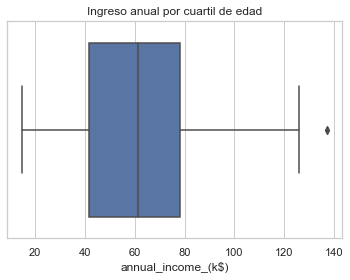

In [22]:
sns.set(style="whitegrid")
ax = sns.boxplot(customers['annual_income_(k$)'])
plt.title('Ingreso anual por cuartil de edad')

4. Genera un histograma con el `Spending Score`

Text(0.5, 1.0, 'Score de gasto')

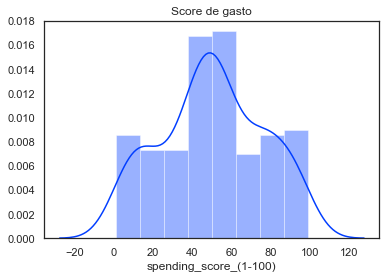

In [23]:
sns.set(color_codes=True)
sns.set(style="white", palette="bright")
ax = sns.distplot(customers['spending_score_(1-100)'])
plt.title('Score de gasto')

5. Genera una gráfica que incluya el histograma de `Spending Score` por `Gender`

In [24]:
male = customers[customers.gender == 'Male']
male.shape

(88, 5)

In [25]:
female = customers[customers.gender == 'Female']
female.shape

(112, 5)

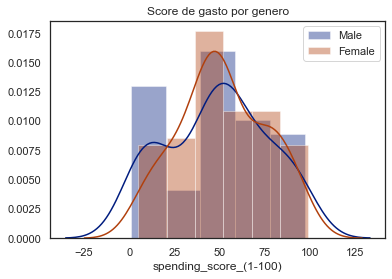

In [26]:
sns.set(style="white", palette="dark")
sns.distplot(male['spending_score_(1-100)'], label = 'Male')
sns.distplot(female['spending_score_(1-100)'], label = 'Female')
plt.title('Score de gasto por genero')
plt.legend()

6. Genera un gráfica que incluya el histograma de `Annual Income` por `Gender`

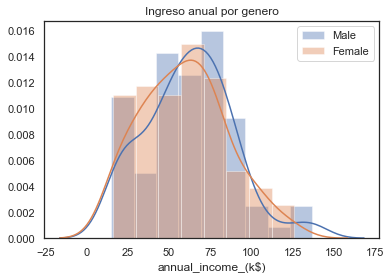

In [28]:
sns.set(style="white", palette="deep")
sns.distplot(male['annual_income_(k$)'], label = 'Male')
sns.distplot(female['annual_income_(k$)'], label = 'Female')
plt.title('Ingreso anual por genero')
plt.legend()

### Extra

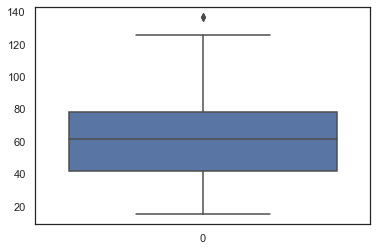

In [29]:
sns.boxplot(data=customers['annual_income_(k$)'])

In [32]:
customers['annual_income_(k$)'].max()
# Nota: No es un gran outlier

137

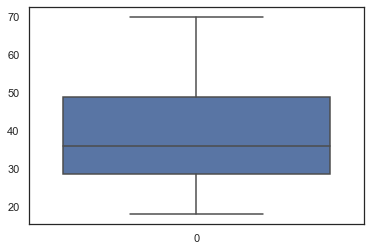

In [33]:
sns.boxplot(data=customers['age'])

In [55]:
customers['age'].max()
# Nota: No es un gran outlier

70

In [49]:
# Transformación de variables 
customers.gender.mask(customers.gender == 'Female','1', inplace=True)
customers.gender.mask(customers.gender == 'Male', '0', inplace=True)
customers.head()
# Nota: No tiene sentido escalar gender

,customerid,gender,age,annual_income_(k$),spending_score_(1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


### Escalamiento de datos

In [50]:
from sklearn.preprocessing import scale

In [53]:
customers_scaled = scale(customers[['age','annual_income_(k$)','spending_score_(1-100)']], with_mean=True, with_std=True)
customers_scaled[:10,]
#Nota: Nos quedamos con las variables age, annual income y spending score

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002]])

### Grupos de 4

In [54]:
from sklearn.cluster import KMeans

np.random.seed(165815)

kmeans = KMeans(n_clusters=4, max_iter=10, n_jobs=-1)
k_means_4 = kmeans.fit(customers_scaled)
k_means_4

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [56]:
k_means_4.cluster_centers_

array([[-0.96249203, -0.78476346,  0.39202966],
       [-0.42880597,  0.97484722,  1.21608539],
       [ 1.08616125, -0.49056525, -0.39717443],
       [ 0.03720536,  0.99011499, -1.18875705]])

In [62]:
labels = k_means_4.labels_
labels[:70]

array([0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0])

In [64]:
data = pd.DataFrame({'age': customers_scaled[:,0], 
                     'annual_income_(k$)': customers_scaled[:,1],
                     'spending_score_(1-100)': customers_scaled[:,2],
                     'group': labels})

data.head()

,age,annual_income_(k$),spending_score_(1-100),group
0,-1.424569,-1.738999,-0.434801,0
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0


In [65]:
data.groupby(['group'])['annual_income_(k$)']\
.count()\
.reset_index()\
.rename(columns={"annual_income_(k$)": "count"})

,group,count
0,0,57
1,1,40
2,2,65
3,3,38


In [66]:
centroids = k_means_4.cluster_centers_
centroids

array([[-0.96249203, -0.78476346,  0.39202966],
       [-0.42880597,  0.97484722,  1.21608539],
       [ 1.08616125, -0.49056525, -0.39717443],
       [ 0.03720536,  0.99011499, -1.18875705]])

In [72]:
data_w_centroids = pd.DataFrame({'age': centroids[:,0], 
                                 'annual_income_(k$)': centroids[:,1],
                                 'spending_score_(1-100)': centroids[:,2],
                                 'group': ['C','C','C','C']})

data_w_centroids

,age,annual_income_(k$),spending_score_(1-100),group
0,-0.962492,-0.784763,0.392030,C
1,-0.428806,0.974847,1.216085,C
2,1.086161,-0.490565,-0.397174,C
3,0.037205,0.990115,-1.188757,C


In [73]:
all_data = data.append(data_w_centroids)

In [82]:
#from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(xs='age', ys='annual_income_(k$)', zs='spending_score_(1-100)')

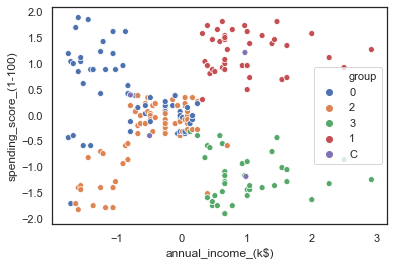

In [83]:
sns.scatterplot(x='annual_income_(k$)', y='spending_score_(1-100)', hue="group", data=all_data)

### Método del codo (Elbow method)

In [84]:
kmeans_3 = KMeans(n_clusters=3, max_iter=10, n_jobs=-1)
k_means_3 = kmeans_3.fit(customers_scaled)
k_means_3

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [85]:
kmeans_5 = KMeans(n_clusters=5, max_iter=10, n_jobs=-1)
k_means_5 = kmeans_5.fit(customers_scaled)
k_means_5

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [86]:
kmeans_6 = KMeans(n_clusters=6, max_iter=10, n_jobs=-1)
k_means_6 = kmeans_6.fit(customers_scaled)
k_means_6

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=6, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [87]:
kmeans_7 = KMeans(n_clusters=7, max_iter=10, n_jobs=-1)
k_means_7 = kmeans_7.fit(customers_scaled)
k_means_7

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=7, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [88]:
kmeans_8 = KMeans(n_clusters=8, max_iter=10, n_jobs=-1)
k_means_8 = kmeans_8.fit(customers_scaled)
k_means_8

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=8, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [89]:
kmeans_9 = KMeans(n_clusters=9, max_iter=10, n_jobs=-1)
k_means_9 = kmeans_9.fit(customers_scaled)
k_means_9

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=9, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [90]:
sses = pd.DataFrame({'k': [3,4,5,6,7,8,9],
                     'sse': [round(k_means_3.inertia_,2), 
                             round(k_means_4.inertia_,2),
                             round(k_means_5.inertia_,2), 
                             round(k_means_6.inertia_,2),
                             round(k_means_7.inertia_,2),
                             round(k_means_8.inertia_,2),
                             round(k_means_9.inertia_,2)]})

sses

,k,sse
0,3,295.21
1,4,205.23
2,5,168.25
3,6,133.89
4,7,117.09
5,8,104.10
6,9,93.41


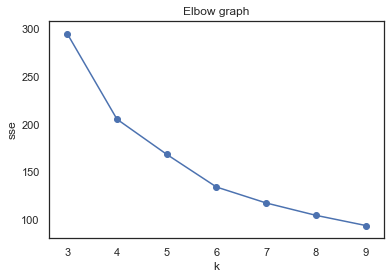

In [91]:
plt.clf()
plt.plot(sses.k, sses.sse)
plt.scatter(sses.k, sses.sse)
plt.xticks([3,4,5,6,7,8,9])
plt.xlabel("k")
plt.ylabel("sse")
plt.title("Elbow graph")
plt.show()